### ARIMA stands for AutoRegressive Integrated Moving Average. It is a popular model for forecasting time series data (data that changes over time, like stock prices or temperature).

### AR (AutoRegressive): The model uses past values to predict future values. For example, today’s value depends on the values from previous days.

### I (Integrated): The model can make the data more stable by subtracting the previous value from the current value (this is called differencing). This helps when the data has trends.

### MA (Moving Average): The model uses past errors (the difference between predicted and actual values) to improve predictions.

### Why use ARIMA?
- ### It helps you predict future values based only on the past values of your data, without needing any extra features.

### Example:
### If you have a list of daily charging durations, ARIMA can help you forecast what the charging duration might be tomorrow, next week, etc., just by looking at the pattern in your previous data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train = pd.read_csv(r"../data/X_train.csv")
X_test = pd.read_csv(r"../data/X_test.csv")
y_train = pd.read_csv(r"../data/y_train.csv")
y_test = pd.read_csv(r"../data/y_test.csv")

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59954, 92), (59954, 1), (14989, 92), (14989, 1))

In [4]:
X_train.columns

Index(['energy_delivered_kwh', 'battery_capacity_kwh', 'vehicle_age_years',
       'battery_health_index', 'charger_power_kw', 'initial_soc_percent',
       'final_soc_percent', 'soc_gained_percent', 'ambient_temperature_c',
       'humidity_percent', 'air_quality_index', 'battery_temperature_c',
       'grid_frequency_hz', 'grid_reliability_index', 'power_quality_score',
       'load_shedding_event', 'grid_load_mw', 'total_cost_inr',
       'station_congestion_level', 'queue_wait_time_min',
       'charger_utilization_rate', 'station_uptime_percent',
       'charging_efficiency_percent', 'charging_curve_efficiency',
       'cooling_system_active', 'thermal_management', 'start_time_year',
       'start_time_month', 'start_time_day', 'start_time_hour',
       'start_time_min', 'start_time_sec', 'end_time_year', 'end_time_month',
       'end_time_day', 'end_time_hour', 'end_time_min', 'end_time_sec',
       'charger_type_AC_SLOW', 'charger_type_DC_FAST',
       'plug_type_Bharat DC001', 

In [5]:
X_test.columns

Index(['energy_delivered_kwh', 'battery_capacity_kwh', 'vehicle_age_years',
       'battery_health_index', 'charger_power_kw', 'initial_soc_percent',
       'final_soc_percent', 'soc_gained_percent', 'ambient_temperature_c',
       'humidity_percent', 'air_quality_index', 'battery_temperature_c',
       'grid_frequency_hz', 'grid_reliability_index', 'power_quality_score',
       'load_shedding_event', 'grid_load_mw', 'total_cost_inr',
       'station_congestion_level', 'queue_wait_time_min',
       'charger_utilization_rate', 'station_uptime_percent',
       'charging_efficiency_percent', 'charging_curve_efficiency',
       'cooling_system_active', 'thermal_management', 'start_time_year',
       'start_time_month', 'start_time_day', 'start_time_hour',
       'start_time_min', 'start_time_sec', 'end_time_year', 'end_time_month',
       'end_time_day', 'end_time_hour', 'end_time_min', 'end_time_sec',
       'charger_type_AC_SLOW', 'charger_type_DC_FAST',
       'plug_type_Bharat DC001', 

In [6]:
y_train.columns

Index(['charging_duration_min'], dtype='object')

In [7]:
y_test.columns

Index(['charging_duration_min'], dtype='object')

### Since ARIMA is a univariate time series model, it only uses the target variable (charging_duration_min).
### It does not use X_train or X_test features. If you want to use features, consider models like SARIMAX or machine learning regressors.

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Prepare the training and test series
train_series = y_train['charging_duration_min']
test_series = y_test['charging_duration_min']

In [10]:
# Fit ARIMA model (order can be tuned, here (1,1,1) is used as an example)
model = ARIMA(train_series, order=(1,1,1))
model_fit = model.fit()

In [11]:
# Forecast for the length of the test set
forecast = model_fit.forecast(steps=len(test_series))

In [12]:
# Evaluate the model
mse = mean_squared_error(test_series, forecast)
mae = mean_absolute_error(test_series, forecast)
r2 = r2_score(test_series, forecast)

In [13]:
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R2 Score: {r2:.2f}")

Test MSE: 7635.66
Test MAE: 62.06
Test R2 Score: -0.00


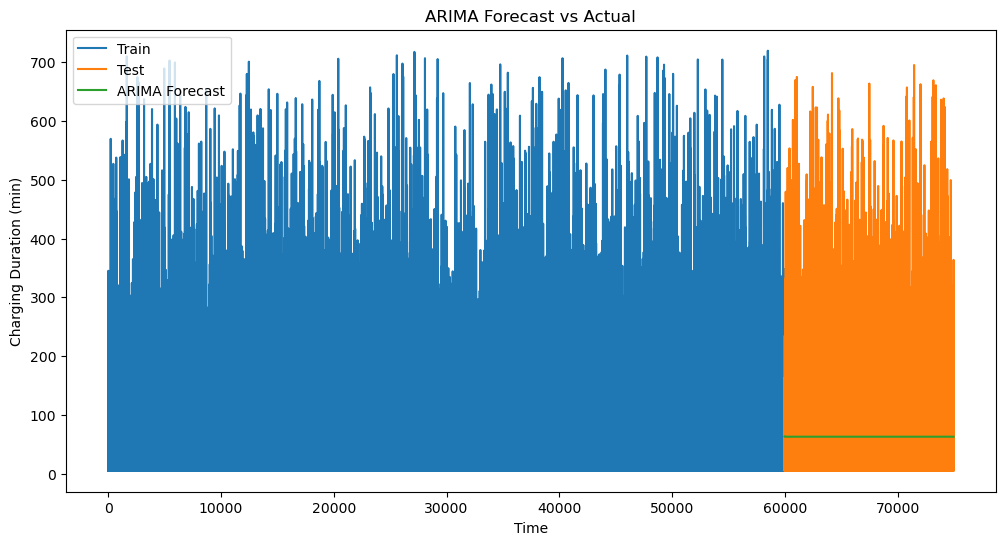

In [14]:
# Visualization: Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(range(len(train_series)), train_series, label='Train')
plt.plot(range(len(train_series), len(train_series)+len(test_series)), test_series.values, label='Test')
plt.plot(range(len(train_series), len(train_series)+len(test_series)), forecast, label='ARIMA Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Charging Duration (min)')
plt.title('ARIMA Forecast vs Actual')
plt.show()

c:\Users\aman2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\aman2\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA order: (0, 0, 0) with Test MSE: 7635.60
Test MSE: 7635.60
Test MAE: 61.82
Test R2 Score: -0.00


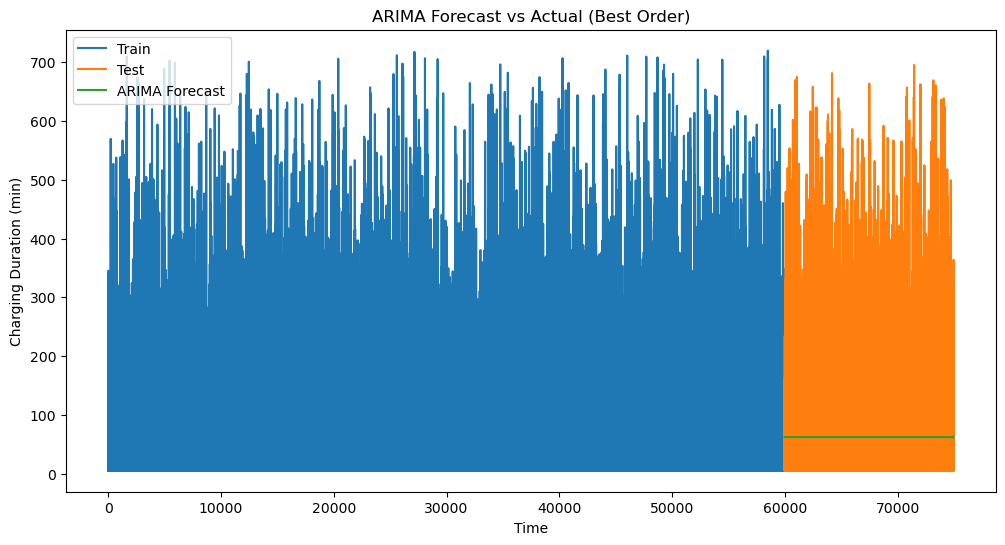

In [15]:
# import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# warnings.filterwarnings("ignore")

best_score = float('inf')
best_order = None

# Try different combinations of p, d, q
for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            try:
                model = ARIMA(train_series, order=(p, d, q))
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=len(test_series))
                mse = mean_squared_error(test_series, forecast)
                if mse < best_score:
                    best_score = mse
                    best_order = (p, d, q)
            except:
                continue

print(f"Best ARIMA order: {best_order} with Test MSE: {best_score:.2f}")

# Fit and evaluate the best model
model = ARIMA(train_series, order=best_order)
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_series))

mse = mean_squared_error(test_series, forecast)
mae = mean_absolute_error(test_series, forecast)
r2 = r2_score(test_series, forecast)

print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R2 Score: {r2:.2f}")

plt.figure(figsize=(12,6))
plt.plot(range(len(train_series)), train_series, label='Train')
plt.plot(range(len(train_series), len(train_series)+len(test_series)), test_series.values, label='Test')
plt.plot(range(len(train_series), len(train_series)+len(test_series)), forecast, label='ARIMA Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Charging Duration (min)')
plt.title('ARIMA Forecast vs Actual (Best Order)')
plt.show()

## Your ARIMA results (even after tuning) show a very low or negative R² score, which means the model is not able to capture the patterns in your data. This is expected because:

### ARIMA only uses the target variable’s past values (charging_duration_min) and ignores all other features in X_train/X_test.
### Your problem likely depends on many features (like battery, weather, charger type, etc.), not just the past charging duration.

## What to do next?

### Since you have many features, you should use a model that can handle exogenous variables (features), such as SARIMAX or a machine learning regressor (Random Forest, XGBoost, etc.).

## Try SARIMAX:
### SARIMAX can use both your target and your X_train/X_test features.
### You can use the code I provided earlier for SARIMAX.

## Summary:

### ARIMA is not suitable for your dataset because it ignores all your features.
### Use SARIMAX or a machine learning model to get better results.
### If SARIMAX also performs poorly, try tree-based regressors or neural networks.
